# Environment Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-remote-sensing-image-data/PatternNet/patternnet_description.pdf
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell363.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell230.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell066.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell779.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell584.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell231.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell690.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell520.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell263.jpg
/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/oil_well/oilwell

In [2]:
import torch
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler



# File path

In [3]:
data_dir="/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images/"

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models



data_dir = '/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images'

def load_split_train_test(datadir,valid_size = 0.1):
    train_trainsforms = transforms.Compose([transforms.Resize((224,224)),
                                            transforms.ToTensor(),])
    test_trainsforms = transforms.Compose([transforms.Resize((224,224)),
                                           transforms.ToTensor(),])

    train_data = datasets.ImageFolder(datadir,transform=train_trainsforms)
    # print("train_data size:",train_data[0][0].size()) # View resize (ensure that the image has 3 channels)
    test_data = datasets.ImageFolder(datadir,transform=test_trainsforms)

    num_train = len(train_data)                               #Number of training sets
    indices = list(range(num_train))                          # 

    split = int(np.floor(valid_size * num_train))             # Get 20% data as a validation set
    np.random.shuffle(indices)                                # 

    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]    #Get training set, test set
    train_sampler = SubsetRandomSampler(train_idx)            # , 
    test_sampler  = SubsetRandomSampler(test_idx)

    #============Data Loader: Load Training Set, Test Set ===================
    train_loader = DataLoader(train_data,sampler=train_sampler,batch_size=64)
    test_loader = DataLoader(test_data,sampler=test_sampler,batch_size=64)
    return train_loader,test_loader


train_loader,test_loader = load_split_train_test(data_dir, 0.1)
print(train_loader.dataset.classes)




['airplane', 'baseball_field', 'basketball_court', 'beach', 'bridge', 'cemetery', 'chaparral', 'christmas_tree_farm', 'closed_road', 'coastal_mansion', 'crosswalk', 'dense_residential', 'ferry_terminal', 'football_field', 'forest', 'freeway', 'golf_course', 'harbor', 'intersection', 'mobile_home_park', 'nursing_home', 'oil_gas_field', 'oil_well', 'overpass', 'parking_lot', 'parking_space', 'railway', 'river', 'runway', 'runway_marking', 'shipping_yard', 'solar_panel', 'sparse_residential', 'storage_tank', 'swimming_pool', 'tennis_court', 'transformer_station', 'wastewater_treatment_plant']


# Resnet50 Backbone

In [5]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

# Model Training and Verification 

1. Resnet50 Backbone + Custom Layer(model)

* Plotting the loss & Accuracy Curve

Epoch 1/10Train loss: 3.152 Test loss: 3.881 Test accuracy: 0.051
Epoch 1/10Train loss: 3.412 Test loss: 2.980 Test accuracy: 0.222
Epoch 1/10Train loss: 2.368 Test loss: 2.449 Test accuracy: 0.431
Epoch 1/10Train loss: 1.909 Test loss: 1.917 Test accuracy: 0.569
Epoch 1/10Train loss: 1.183 Test loss: 1.400 Test accuracy: 0.673
Epoch 1/10Train loss: 1.109 Test loss: 1.046 Test accuracy: 0.728
Epoch 1/10Train loss: 0.840 Test loss: 0.796 Test accuracy: 0.796
Epoch 1/10Train loss: 0.659 Test loss: 0.698 Test accuracy: 0.811
Epoch 1/10Train loss: 0.623 Test loss: 0.555 Test accuracy: 0.843
Epoch 1/10Train loss: 0.639 Test loss: 0.444 Test accuracy: 0.884
Epoch 1/10Train loss: 0.414 Test loss: 0.329 Test accuracy: 0.916
Epoch 1/10Train loss: 0.448 Test loss: 0.306 Test accuracy: 0.918
Epoch 1/10Train loss: 0.408 Test loss: 0.270 Test accuracy: 0.926
Epoch 1/10Train loss: 0.316 Test loss: 0.257 Test accuracy: 0.927
Epoch 1/10Train loss: 0.327 Test loss: 0.203 Test accuracy: 0.948
Epoch 1/10

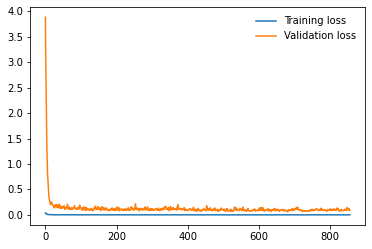

In [6]:

"""
       First, we must freeze the pre-trained layers so they don't backproparate during training.
       Then, we redefine the final fully connected layer, the layer that is trained using our image.
                 We also created the standard (loss function) and selected an optimizer (in this case Adam) and learning rate.
"""
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(nn.Linear(2048,512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512,38),
                         nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.003)
model.to(device)


epochs = 10
steps = 0
running_loss = 0
train_losses,test_losses = [],[]


for epoch in range(epochs):
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        out = model(inputs)
        loss = criterion(out,labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
        steps +=1

        if (steps+1)%5 == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs,labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    out2 = model(inputs)
                    batch_loss = criterion(out2,labels)
                    test_loss +=batch_loss.item()

                    ps = torch.exp(out2)
                    top_pred,top_class = ps.topk(1,dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))

            print(f"Epoch {epoch+1}/{epochs}"
                  f"Train loss: {running_loss/5:.3f}",
                  f"Test loss: {test_loss/len(test_loader):.3f} "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            model.train()
torch.save(model,"./pytorch_Image_Training.pth")

plt.plot(train_losses,label = "Training loss")
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

# Predications part

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision import datasets, transforms




# Set image size and training one

In [8]:

data_dir2 = '/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images'

test_trainsforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),])



In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:

model = torch.load('./pytorch_Image_Training.pth')

model.eval()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Forecast image (enter specific image: eg:"./xxx.jpg")

In [11]:

def predict_img(image):
    image_tensor = test_trainsforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor).to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index


# Get random images
def get_random_images(num):
    data = datasets.ImageFolder(data_dir2,transform=test_trainsforms)
    classes = data.classes
    print("classes:",classes)

    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]                 # Get random forecast data

    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx) #Get the forecast data again upset
    loader = DataLoader(data,sampler=sampler,batch_size=num)
    dataiter = iter(loader)

    images,labels = dataiter.next()
    return images,labels,classes



# Visualize output

classes: ['airplane', 'baseball_field', 'basketball_court', 'beach', 'bridge', 'cemetery', 'chaparral', 'christmas_tree_farm', 'closed_road', 'coastal_mansion', 'crosswalk', 'dense_residential', 'ferry_terminal', 'football_field', 'forest', 'freeway', 'golf_course', 'harbor', 'intersection', 'mobile_home_park', 'nursing_home', 'oil_gas_field', 'oil_well', 'overpass', 'parking_lot', 'parking_space', 'railway', 'river', 'runway', 'runway_marking', 'shipping_yard', 'solar_panel', 'sparse_residential', 'storage_tank', 'swimming_pool', 'tennis_court', 'transformer_station', 'wastewater_treatment_plant']


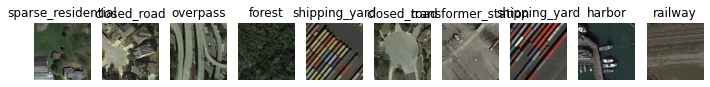

In [12]:
if __name__ == '__main__':
    path = '/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images'
    
    to_pil = transforms.ToPILImage()
    
    images, labels ,classes= get_random_images(10)
    
    fig = plt.figure(figsize=(12,12))
    
    
    for i in range(len(images)):
        image = to_pil(images[i])
        index = predict_img(image)
        sub = fig.add_subplot(1,len(images),i+1)
        res = int(labels[i]) == index
        str(sub.set_title(str(classes[index])))+":"+str(res)
        plt.axis('off')
        plt.imshow(image)
    plt.show()

# Additional part for Prediction

In [13]:

def loadtestdata(img_path,num):
    testset = datasets.ImageFolder(img_path,
                                   transform=transforms.Compose([
                                       transforms.Resize((224, 224)),
                                       transforms.ToTensor()]))
    testloader = DataLoader(testset, batch_size=num,shuffle=True, num_workers=4)

    dataiter = iter(testloader)
    images,labels = dataiter.next()
    classes = testloader.dataset.classes
    print("classes:",classes)
    return images,labels,classes

In [14]:
def imshow(img):
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


def test(weghts_path,img_path,num):
    net = torch.load(weghts_path)
    images, labels, classes = loadtestdata(img_path,num)
    imshow(torchvision.utils.make_grid(images, nrow=5))                               # nrow is the number of pictures displayed per line, the default is 8
    print('GroundTruth: ', " ".join('%5s' % classes[labels[j]] for j in range(num)))  # print (label of the image in the test set)

    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    print('Predicted: ', " ".join('%5s' % classes[predicted[j]] for j in range(num)))


# Test image or Viusalize output

In [15]:
import torchvision

classes: ['airplane', 'baseball_field', 'basketball_court', 'beach', 'bridge', 'cemetery', 'chaparral', 'christmas_tree_farm', 'closed_road', 'coastal_mansion', 'crosswalk', 'dense_residential', 'ferry_terminal', 'football_field', 'forest', 'freeway', 'golf_course', 'harbor', 'intersection', 'mobile_home_park', 'nursing_home', 'oil_gas_field', 'oil_well', 'overpass', 'parking_lot', 'parking_space', 'railway', 'river', 'runway', 'runway_marking', 'shipping_yard', 'solar_panel', 'sparse_residential', 'storage_tank', 'swimming_pool', 'tennis_court', 'transformer_station', 'wastewater_treatment_plant']


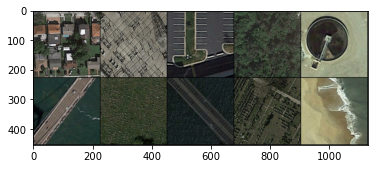

GroundTruth:  dense_residential transformer_station parking_space forest wastewater_treatment_plant bridge cemetery bridge cemetery beach
Predicted:  dense_residential transformer_station runway_marking chaparral wastewater_treatment_plant bridge cemetery bridge cemetery beach


In [16]:


if __name__ == '__main__':
    
    weghts_path = './pytorch_Image_Training.pth'
    
    img_path = "/kaggle/input/satellite-remote-sensing-image-data/PatternNet/images"
    
    test(weghts_path,img_path,num=10)         #Please enter the number of test images